Simulation finished.
Agent 1 collected 3 resources.
Agent 3 collected 4 resources.
Agent 2 collected 7 resources.
Agent 0 collected 6 resources.


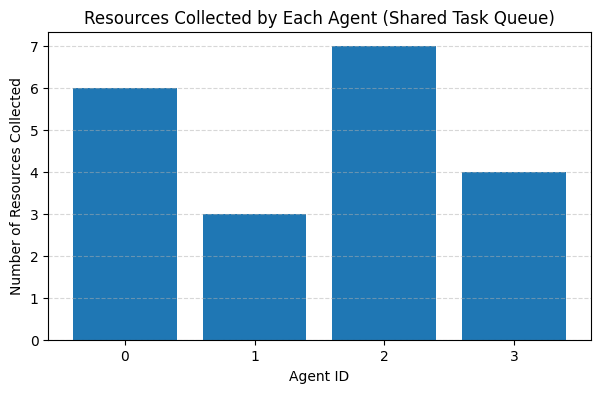

In [4]:
import random
import matplotlib.pyplot as plt

# ======================
# SIMPLE CONFIG
# ======================
NUM_AGENTS = 4          # agents ki sankhya
NUM_RESOURCES = 20      # total resources (tasks)
random.seed(0)          # repeatable result ke liye (optional)

# ======================
# SHARED TASK QUEUE
# ======================
# Map ko simple bana diya -> sirf resource IDs (0,1,2,...)
shared_task_queue = list(range(NUM_RESOURCES))
random.shuffle(shared_task_queue)   # tasks random order me

# ======================
# AGENTS (VERY SIMPLE)
# ======================
# Har agent ka ek ID aur collected count
agents = []
for i in range(NUM_AGENTS):
    agents.append({
        "id": i,
        "collected": 0
    })

# ======================
# SIMULATION
# ======================
# Idea:
# Jab tak shared_task_queue me resource bache hue hain,
# har round me har agent khud decide karega ki task le ya nahi.

round_no = 0
while shared_task_queue:
    round_no += 1
    # agents ka order shuffle -> thoda aur "distributed" feel
    random.shuffle(agents)

    for agent in agents:
        if not shared_task_queue:
            break  # agar tasks khatam, loop se bahar

        # DISTRIBUTED DECISION LOGIC:
        # har agent ke paas choice hai ki iss round me kaam kare ya skip kare
        will_work = random.random() < 0.6   # 60% chance ki kaam karega

        if will_work:
            # Agent shared queue se ek resource le raha hai (cooperation)
            task = shared_task_queue.pop(0)
            agent["collected"] += 1
            # print(f"Round {round_no}, Agent {agent['id']} collected resource {task}")

# ======================
# RESULT PRINT
# ======================
print("Simulation finished.")
for agent in agents:
    print(f"Agent {agent['id']} collected {agent['collected']} resources.")

# ======================
# OUTPUT PLOT
# ======================
agent_ids = [a["id"] for a in agents]
collected_counts = [a["collected"] for a in agents]

plt.figure(figsize=(7, 4))
plt.bar(agent_ids, collected_counts)
plt.xlabel("Agent ID")
plt.ylabel("Number of Resources Collected")
plt.title("Resources Collected by Each Agent (Shared Task Queue)")
plt.xticks(agent_ids)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
